![MontyHall.png](Images/MontyHall.png)


# Simulation de Monty Hall 

Il s'agit de l'implémentaion du problème appelé Monty Hall en référence à l'animateur du jeu télévisé américain [Let's Make a Deal](https://fr.wikipedia.org/wiki/Let%27s_Make_a_Deal). L'énoncé est très simple, mais la solution est souvent considérée comme contre-intuitive.  

> « Supposez que vous êtes sur le plateau d'un jeu télévisé, face à trois portes et que vous devez choisir d'en ouvrir une seule, en sachant que derrière l'une d'elles se trouve une voiture et derrière les deux autres des chèvres. Vous choisissez une porte, disons la numéro 1, et le présentateur, qui sait, lui, ce qu'il y a derrière chaque porte, ouvre une autre porte, disons la numéro 3, porte qui une fois ouverte découvre une chèvre. Il vous demande alors : « désirez-vous ouvrir la porte numéro 2 ? ». Avez-vous intérêt à changer votre choix ? »

Il est nécessaire de compléter cet énoncé, pour éviter toute ambiguité par :
1. Le présentateur doit toujours ouvrir une porte  qui n'a pas été choisie par vous, derrière laquelle il y a une chèvre.
1. Le choix qui vous est offert est entre la porte choisie à l'origine et la porte fermée restante.

Pour déterminer la bonne stratégie, on simule le jeu et on le répète de nombreuse fois.

Commençons par réaliser une fonction qui tire aléatoirement la place de la voiture et le choix du joueur.



## Choix d'une porte par le joueur


In [1]:
import random

def simulation(modifie=False, nb_portes=3, graine=None, trace=False):

    if graine is not None:
        random.seed(graine)

    ou_est_la_voiture = random.randint(0, nb_portes - 1)
    choix = random.randint(0, nb_portes - 1)
    gagne = ou_est_la_voiture == choix
    if (trace):
        print(f"La voiture est derrière la porte # {ou_est_la_voiture + 1}")
        print(f"Le choix du joueur est la porte  # {choix + 1}")
    if (modifie):
        return not gagne
    else:
        return gagne
    
simulation(trace=True)
games = [i + 1 for i in range(10)]
games

La voiture est derrière la porte # 2
Le choix du joueur est la porte  # 2


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## On répéte n x fois l'expérience

On répète donc n fois l'expérience et on va compter le nombre de fois que l'on gagne. Pour cela on fixe la stratégie. 

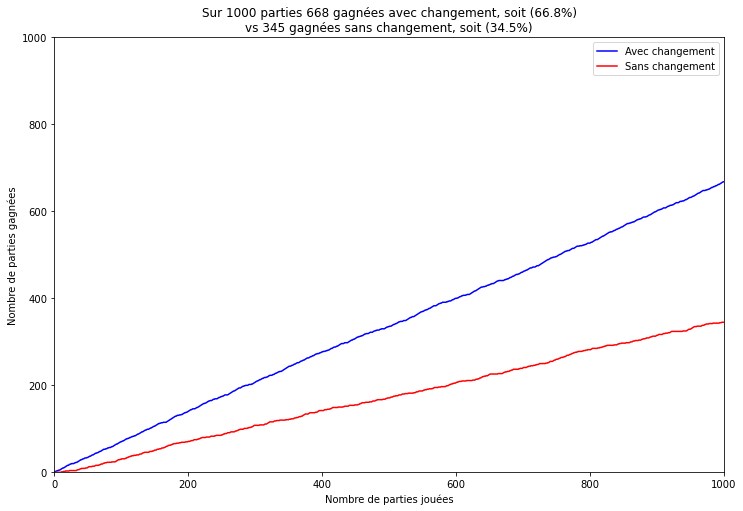

In [2]:
from random import seed
from numpy import mean, cumsum
from matplotlib import pyplot as plt
import os
import time

seed(1)
nb_iterations = 1000
resultat_avec_chgt = [simulation(modifie = True) for _ in range(nb_iterations)]
resultat_sans_chgt = [simulation(modifie = False) for _ in range(nb_iterations)]


titre = f'Sur {nb_iterations} parties {sum(resultat_avec_chgt)} gagnées avec changement, soit ({mean(resultat_avec_chgt) * 100:.1f}%)' + \
    '\n' + \
    f'vs {sum(resultat_sans_chgt)} gagnées sans changement, soit ({mean(resultat_sans_chgt) * 100:.1f}%)'
parties = [i+1 for i in range(nb_iterations)] 
plt.figure(figsize=(12, 8))
plt.plot(parties, cumsum(resultat_avec_chgt), color='blue', label='Avec changement')
plt.plot(parties, cumsum(resultat_sans_chgt), color='red', label='Sans changement')
plt.axis([0, nb_iterations, 0, nb_iterations])
plt.title(titre)
plt.legend()
plt.xlabel('Nombre de parties jouées')
plt.ylabel('Nombre de parties gagnées')

plt.show()

On constate que la bonne stratégie consiste donc à changer de porte pour augmenter ses chances. Nous avons à l'aide d'un petit programme trouvé la solution, mais les pigeons nous appelle à un peu d'humilité. En effet, Herbranson et Schroeder ont montré en 2010 que les pigeons après une centaine de tentatives retenaient que la bonne stratégie consistait à changer<span id="a1">[¹](#1)</span>.


![PigeonsMontyHall.png](Images/PigeonsMontyHall.png)


<span id="1"> 

1. HERBRANSON, Walter T. and SCHROEDER, Julia, 2010. Are birds smarter than mathematicians? Pigeons (Columba livia) perform optimally on a version of the Monty Hall Dilemma. *Journal of Comparative Psychology* [online]. 2010. Vol. 124, no. 1, p. 1–13. [Accessed 13 January 2022]. DOI [10/ds2rnn](10/ds2rnn). Available from: [10/ds2rnn](10/ds2rnn)</span>[⏎](#a1)<br>